# (PP) Fruits and Vegetable classification

In [1]:
from fastai2.vision.all import *

In [2]:
import os
os.getcwd()

'/home/ubuntu/fastai2_projects'

In [9]:
path = Path('/home/ubuntu/fastai2_projects/')

In [4]:
path.ls()

(#7) [Path('/home/ubuntu/fastai2_projects/Data/.ipynb_checkpoints'),Path('/home/ubuntu/fastai2_projects/Data/Energy'),Path('/home/ubuntu/fastai2_projects/Data/Bear'),Path('/home/ubuntu/fastai2_projects/Data/Pneumonia'),Path('/home/ubuntu/fastai2_projects/Data/Rossman'),Path('/home/ubuntu/fastai2_projects/Data/SIIM'),Path('/home/ubuntu/fastai2_projects/Data/Bees')]

In [5]:
d_path = Path('/home/ubuntu/fastai2_projects/Data/Fruits')
d_path.mkdir(exist_ok=True)

In [6]:
d_path.ls()

(#0) []

In [10]:
!unzip -q -n {path}/fruits.zip -d {d_path}

In [13]:
d_path.ls()

(#1) [Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360')]

In [14]:
(d_path/'fruits-360').ls()

(#6) [Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/LICENSE'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/papers'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/test-multiple_fruits'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/readme.md'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test')]

In [15]:
t_path = d_path/'fruits-360'/'Training'

In [16]:
t_path.ls()

(#131) [Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Huckleberry'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Apple Braeburn'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Cherry Wax Yellow'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Tamarillo'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Grape White 4'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Pear Kaiser'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Plum'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Peach'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Orange'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Nectarine')...]

In [17]:
Path.BASE_PATH = t_path

In [19]:
t_path.ls()

(#131) [Path('Huckleberry'),Path('Apple Braeburn'),Path('Cherry Wax Yellow'),Path('Tamarillo'),Path('Grape White 4'),Path('Pear Kaiser'),Path('Plum'),Path('Peach'),Path('Orange'),Path('Nectarine')...]

In [20]:
img = get_image_files(t_path)

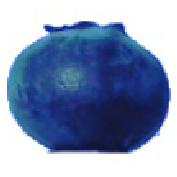

In [21]:
fn = PILImage.create(img[1])
fn.show()

In [23]:
fruits = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(seed=42),
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224, min_scale=0.75)
)

In [24]:
fruits.summary(t_path)

Setting-up type transforms pipelines
Found 67692 items
2 datasets of sizes 54154,13538
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Pepino/r_66_100.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=100x100
  Pipeline: parent_label -> Categorize
    starting from
      /home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Training/Pepino/r_66_100.jpg
    applying parent_label gives
      Pepino
    applying Categorize gives
      TensorCategory(92)

Final sample: (PILImage mode=RGB size=100x100, TensorCategory(92))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> RandomResizedCropGPU -> LightingTfm


/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "



Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=100x100, TensorCategory(92))
    applying Resize gives
      (PILImage mode=RGB size=460x460, TensorCategory(92))
    applying ToTensor gives
      (TensorImage of size 3x460x460, TensorCategory(92))

Adding the next 3 samples

No before_batch transform to apply

Collating items in a batch

Applying batch_tfms to the batch built
  Pipeline: IntToFloatTensor -> AffineCoordTfm -> RandomResizedCropGPU -> LightingTfm
    starting from
      (TensorImage of size 4x3x460x460, TensorCategory([92,  2, 41, 56], device='cuda:0'))
    applying IntToFloatTensor gives
      (TensorImage of size 4x3x460x460, TensorCategory([92,  2, 41, 56], device='cuda:0'))
    applying AffineCoordTfm gives
      (TensorImage of size 4x3x460x460, TensorCategory([92,  2, 41, 56], device='cuda:0'))
    applying RandomResizedCropGPU gives
      (TensorImage of size 4x3x224x224, Ten

In [25]:
dls = fruits.dataloaders(t_path, bs=64)

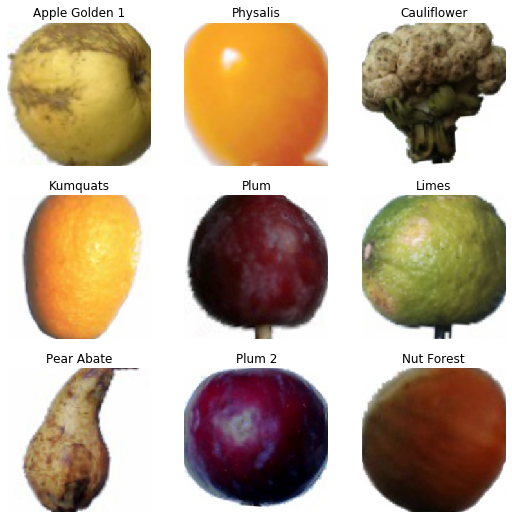

In [26]:
dls.show_batch()

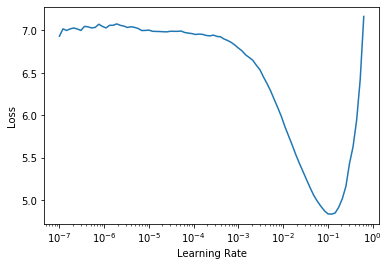

In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [28]:
print(f'Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}')

Minimum/10: 1.20e-02, steepest point: 9.12e-03


In [ ]:
lr = 1e-2

In [29]:
learn.fit_one_cycle(5, base_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.133149,0.014127,0.002216,01:44
1,0.025072,0.000781,0.000000,01:46
2,0.009825,0.000564,0.000222,01:44
3,0.003211,0.000462,0.000148,01:45
4,0.002983,0.000041,0.000000,01:47


/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [30]:
dls = fruits.dataloaders(t_path, ds=64)

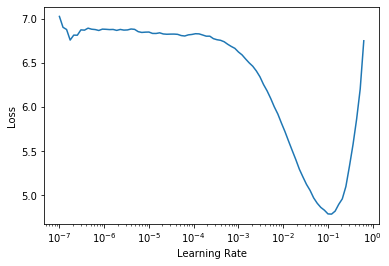

In [31]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()

In [32]:
print(f'Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}')

Minimum/10: 1.20e-02, steepest point: 1.91e-02


In [33]:
learn.fine_tune(3, base_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.246035,0.036409,0.010267,01:45


/home/ubuntu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


epoch,train_loss,valid_loss,error_rate,time
0,0.190724,0.082512,0.021643,02:07
1,0.019959,0.003567,0.001403,02:07
2,0.002747,0.000143,0.000074,02:07


In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=5)

[]

In [35]:
learn.save('fruits-rn50')

In [36]:
test_path = Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/')
test_path.ls()

(#131) [Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Huckleberry'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Apple Braeburn'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Cherry Wax Yellow'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Tamarillo'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Grape White 4'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Pear Kaiser'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Plum'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Peach'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Orange'),Path('/home/ubuntu/fastai2_projects/Data/Fruits/fruits-360/Test/Nectarine')...]

In [37]:
test_items = get_image_files(test_path)

In [38]:
dl = learn.dls.test_dl(test_items, rm_type_tfms=1, bs=64)

In [39]:
preds, _ = learn.get_preds(dl=dl)

In [40]:
preds.shape

torch.Size([22688, 131])

In [41]:
thresh = 0.5
labelled_preds = [' '.join([learn.dls.vocab[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds.numpy()]

In [42]:
labelled_preds[:5]

['Huckleberry', 'Huckleberry', 'Huckleberry', 'Huckleberry', 'Huckleberry']

In [43]:
y_test = list(map(lambda x: x.parents[0].name, test_items))

In [44]:
results = pd.DataFrame({'target': y_test, 'pred': labelled_preds})

In [45]:
accuracy = results[results.target==results.pred].shape[0] / results.shape[0]

In [46]:
accuracy

0.9978843441466855